<a href="https://colab.research.google.com/github/priyam182003a/LOGIN-PAGE/blob/main/Intelligent_Trading_Insights_Uncovering_Patterns_Between_Sentiment_and_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

# Load the uploaded CSV files
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")
trader_df = pd.read_csv("/content/historical_data.csv")

# Display the first few rows of each DataFrame
sentiment_df.head(), trader_df.head()

(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

In [13]:
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date'])
trader_df['time'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M")

In [14]:
trader_df['Date'] = trader_df['time'].dt.date
sentiment_df['Date'] = sentiment_df['Date'].dt.date

# Merge on 'Date'
merged_df = pd.merge(trader_df, sentiment_df, on='Date', how='left')

In [15]:
avg_price_by_sentiment = merged_df.groupby('classification')['Execution Price'].mean().reset_index()


/tmp/ipython-input-19-2705976000.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_by_sentiment, x='classification', y='Execution Price', palette='viridis')


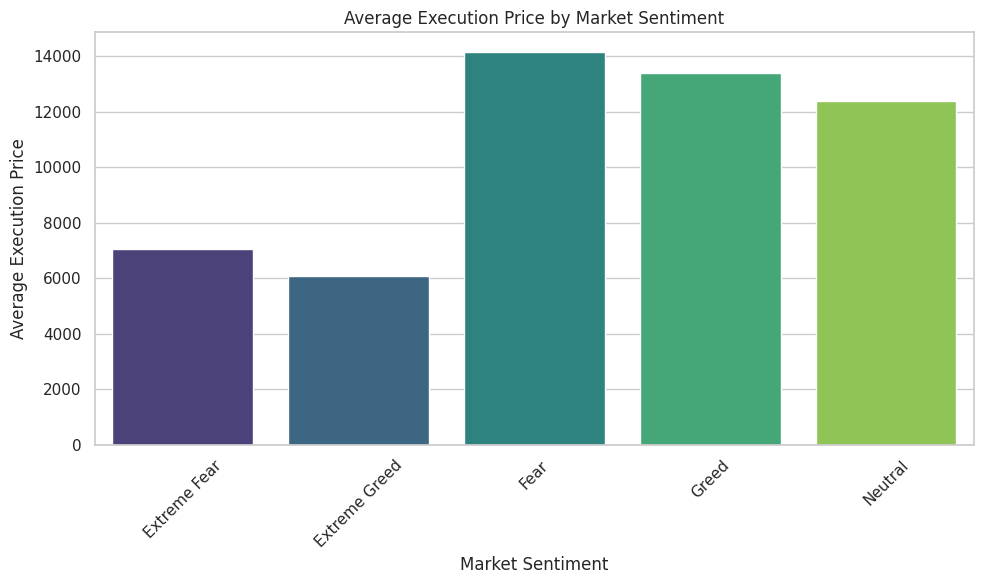

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot 1: Average Execution Price by Sentiment
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_sentiment, x='classification', y='Execution Price', palette='viridis')
plt.title("Average Execution Price by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Execution Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
trade_count_by_sentiment = merged_df['classification'].value_counts().reset_index()
trade_count_by_sentiment.columns = ['Sentiment', 'Trade Count']


/tmp/ipython-input-20-2910656386.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trade_count_by_sentiment, x='Sentiment', y='Trade Count', palette='magma')


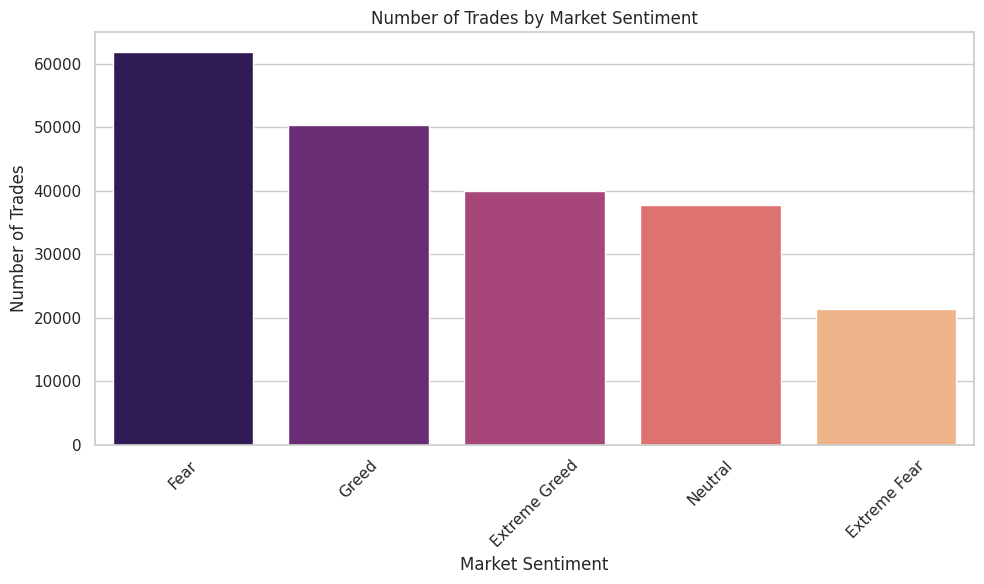

In [20]:
# Plot 2: Trade Counts by Sentiment Classification
plt.figure(figsize=(10, 6))
sns.barplot(data=trade_count_by_sentiment, x='Sentiment', y='Trade Count', palette='magma')
plt.title("Number of Trades by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
correlation = merged_df[['value', 'Execution Price']].corr().iloc[0,1]


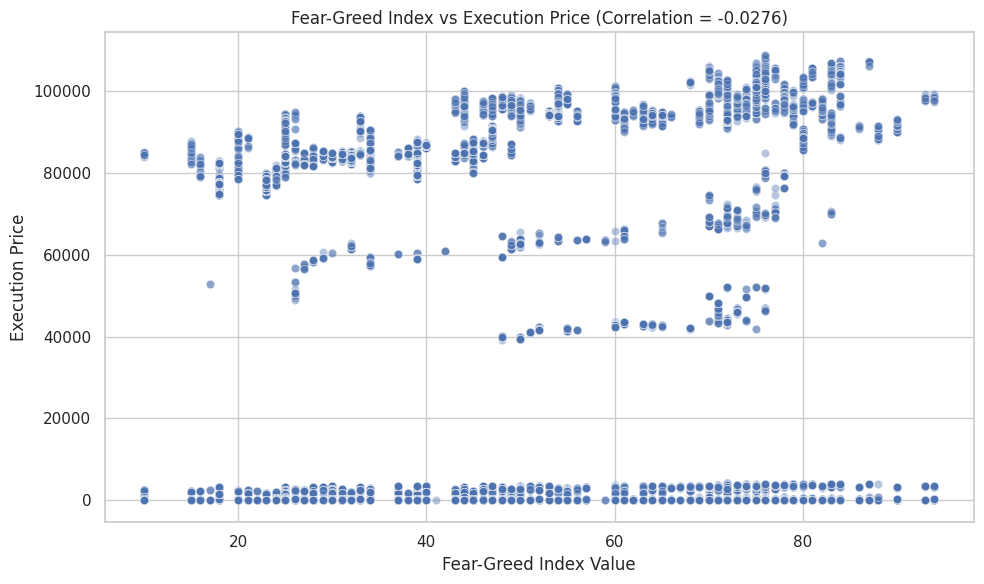

In [21]:
# Plot 3: Scatter plot of Fear-Greed Value vs Execution Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='value', y='Execution Price', alpha=0.4)
plt.title(f"Fear-Greed Index vs Execution Price (Correlation = {correlation:.4f})")
plt.xlabel("Fear-Greed Index Value")
plt.ylabel("Execution Price")
plt.tight_layout()
plt.show()

In [18]:
# Step 1: Convert date columns
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date']).dt.date
trader_df['time'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M")
trader_df['Date'] = trader_df['time'].dt.date

# Step 2: Merge datasets on 'Date'
merged_df = pd.merge(trader_df, sentiment_df, on='Date', how='left')

# Step 3: Average execution price by sentiment classification
avg_price_by_sentiment = merged_df.groupby('classification')['Execution Price'].mean().reset_index()

# Step 4: Count of trades under each sentiment classification
trade_count_by_sentiment = merged_df['classification'].value_counts().reset_index()
trade_count_by_sentiment.columns = ['Sentiment', 'Trade Count']

# Step 5: Correlation between Fear-Greed Value and Execution Price
correlation = merged_df[['value', 'Execution Price']].corr().iloc[0, 1]

avg_price_by_sentiment, trade_count_by_sentiment, correlation


(  classification  Execution Price
 0   Extreme Fear      7054.795108
 1  Extreme Greed      6082.195865
 2           Fear     14152.620222
 3          Greed     13411.276344
 4        Neutral     12393.692779,
        Sentiment  Trade Count
 0           Fear        61837
 1          Greed        50303
 2  Extreme Greed        39992
 3        Neutral        37686
 4   Extreme Fear        21400,
 np.float64(-0.027558242640247362))

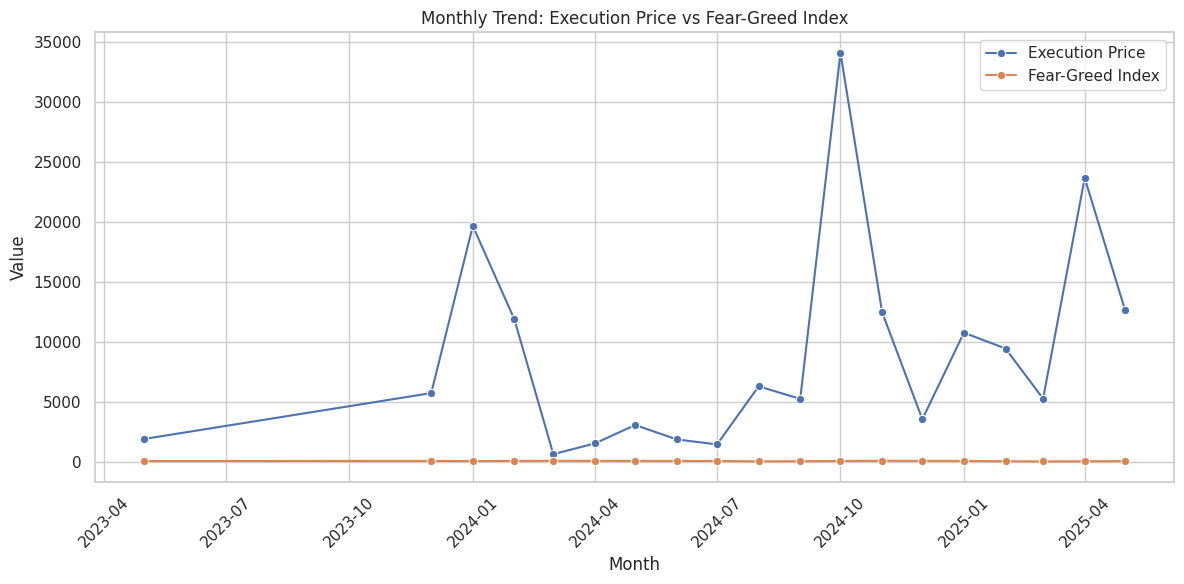

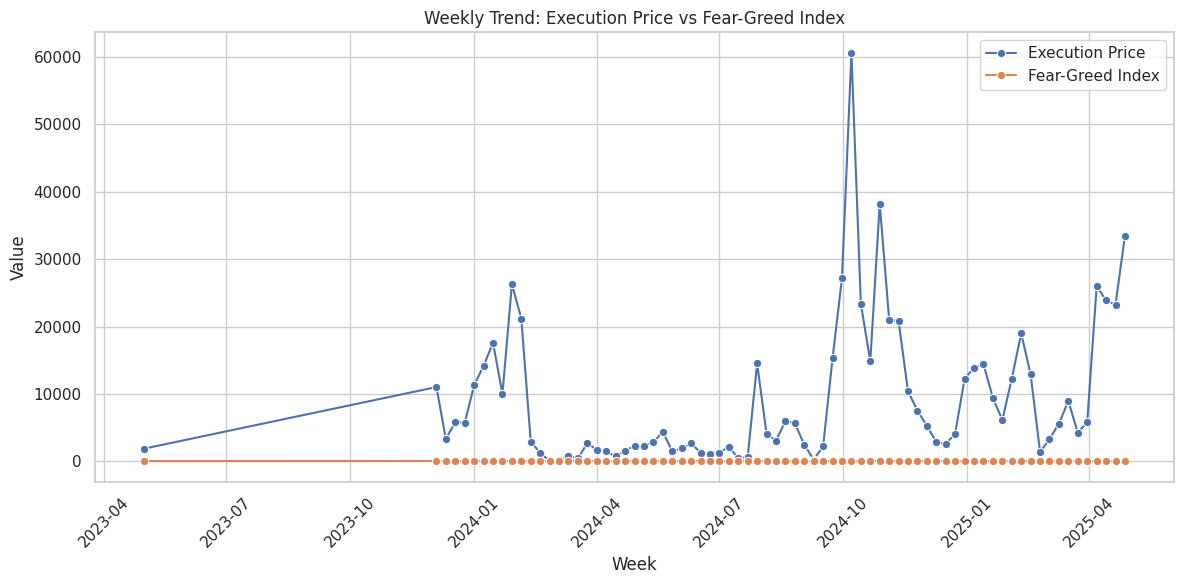

In [23]:
# Convert 'Date' back to datetime for time series operations
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Create new columns for month and week
merged_df['Month'] = merged_df['Date'].dt.to_period('M')
merged_df['Week'] = merged_df['Date'].dt.to_period('W')

# 1. Monthly average execution price and sentiment index
monthly_avg = merged_df.groupby('Month').agg({
    'Execution Price': 'mean',
    'value': 'mean'
}).reset_index()

# Convert Month Period to datetime for plotting
monthly_avg['Month'] = monthly_avg['Month'].dt.start_time

# 2. Weekly average execution price and sentiment index
weekly_avg = merged_df.groupby('Week').agg({
    'Execution Price': 'mean',
    'value': 'mean'
}).reset_index()

# Convert Week Period to datetime for plotting
weekly_avg['Week'] = weekly_avg['Week'].dt.start_time


# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='Month', y='Execution Price', label='Execution Price', marker='o')
sns.lineplot(data=monthly_avg, x='Month', y='value', label='Fear-Greed Index', marker='o')
plt.title("Monthly Trend: Execution Price vs Fear-Greed Index")
plt.xlabel("Month")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_avg, x='Week', y='Execution Price', label='Execution Price', marker='o')
sns.lineplot(data=weekly_avg, x='Week', y='value', label='Fear-Greed Index', marker='o')
plt.title("Weekly Trend: Execution Price vs Fear-Greed Index")
plt.xlabel("Week")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-33-28596929.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='Execution Price', data=merged_df, palette='coolwarm')


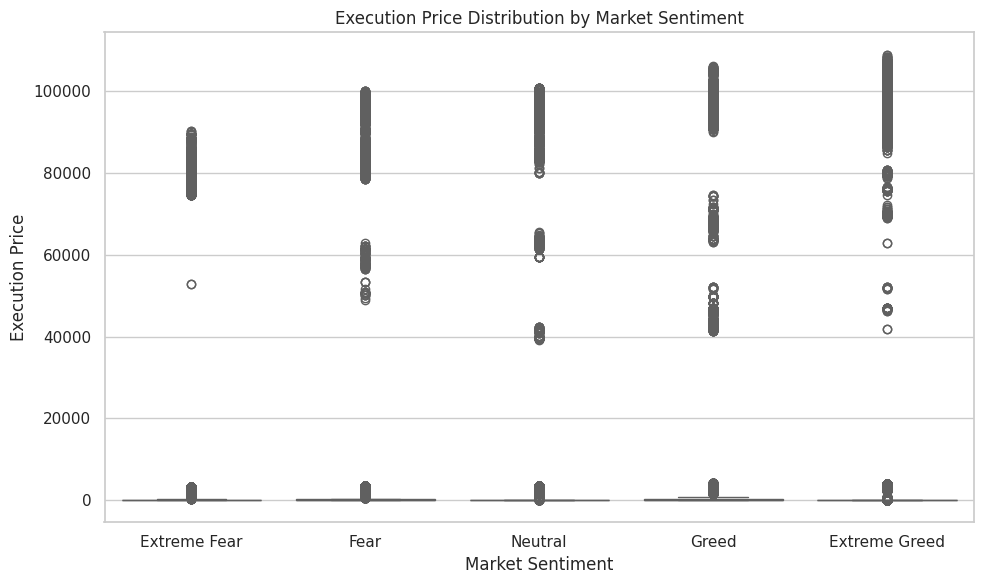

/tmp/ipython-input-33-28596929.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='classification', palette='Set2')


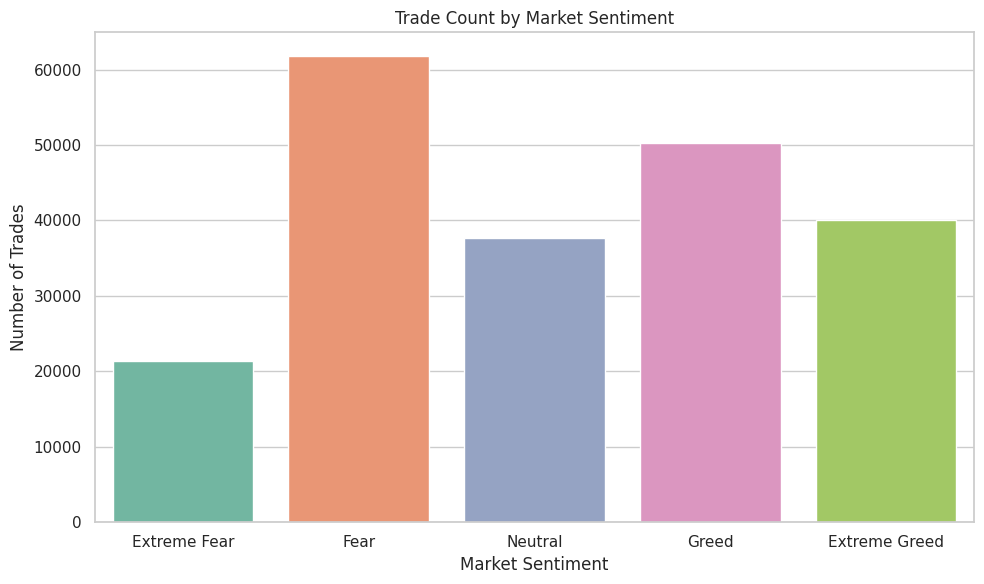

/tmp/ipython-input-33-28596929.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='Closed PnL', data=merged_df, palette='viridis')


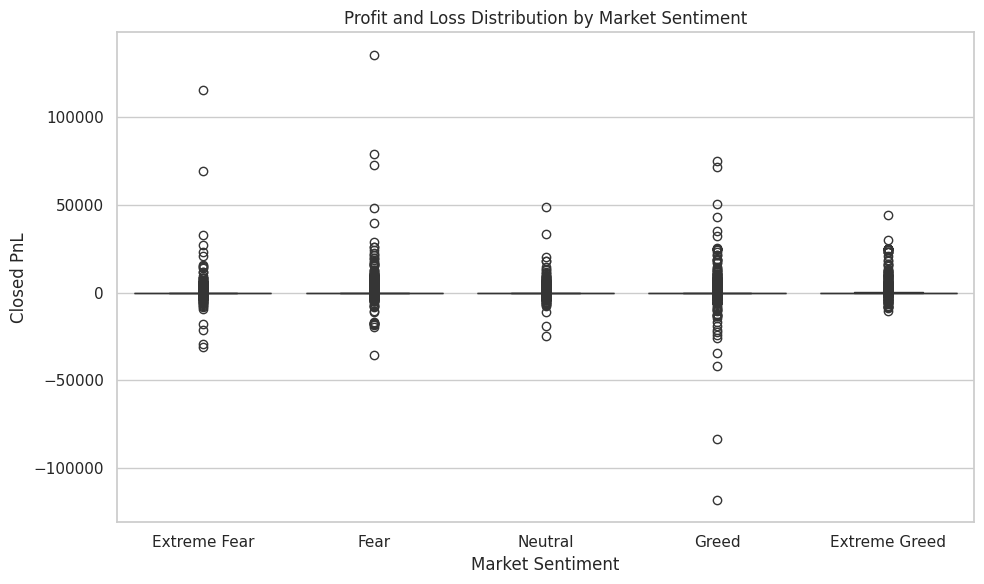

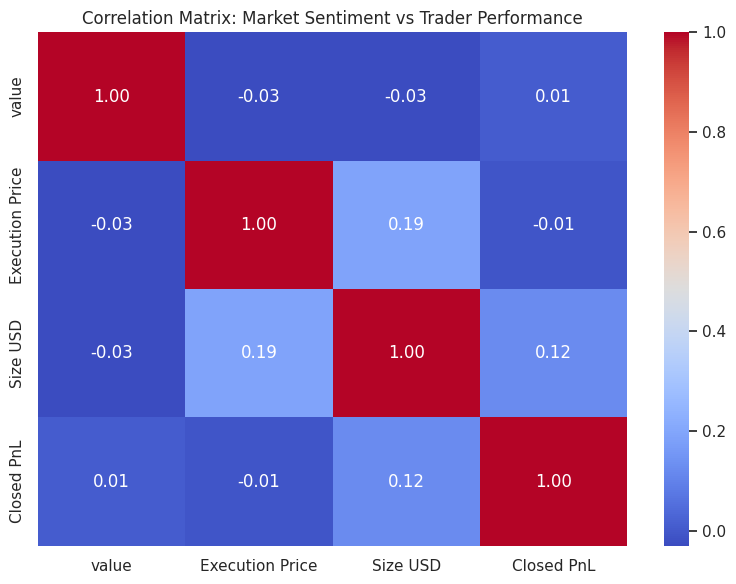

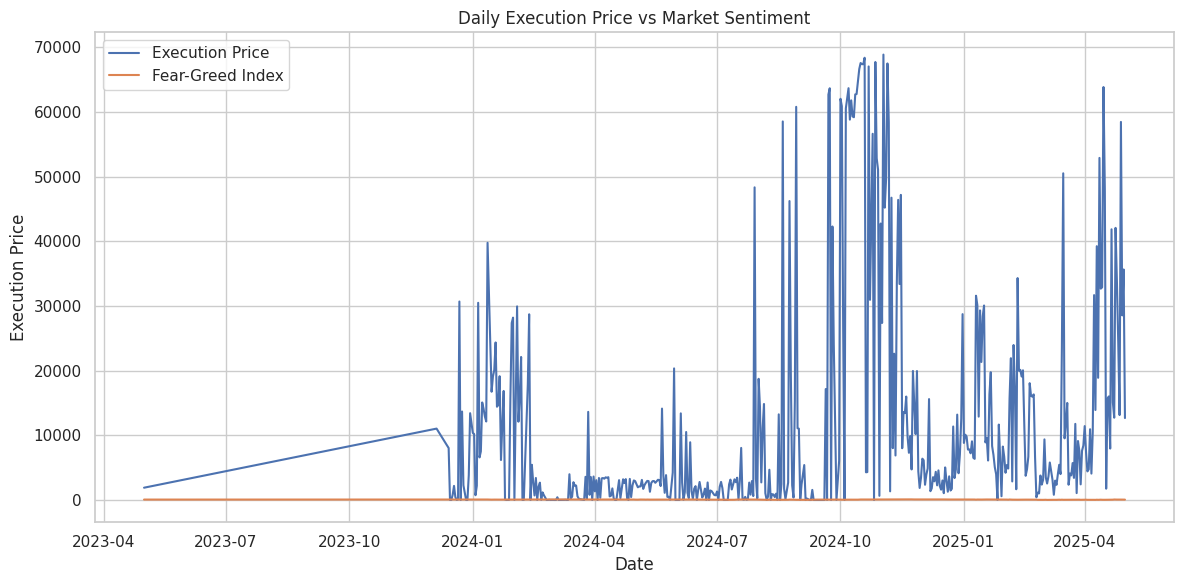

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sentiment_df = pd.read_csv("fear_greed_index.csv")
trader_df = pd.read_csv("historical_data.csv")

# Preprocess date columns
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date']).dt.date
trader_df['time'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M")
trader_df['Date'] = trader_df['time'].dt.date

# Merge datasets on Date
merged_df = pd.merge(trader_df, sentiment_df[['Date', 'value', 'classification']], on='Date', how='left')

# Categorize sentiment for clarity
sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
merged_df['classification'] = pd.Categorical(merged_df['classification'], categories=sentiment_order, ordered=True)

#  1. Sentiment vs Execution Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Execution Price', data=merged_df, palette='coolwarm')
plt.title('Execution Price Distribution by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Execution Price')
plt.tight_layout()
plt.show()

#  2. Trade Volume vs Market Sentiment
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='classification', palette='Set2')
plt.title('Trade Count by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.tight_layout()
plt.show()

#  3. PnL Analysis
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df, palette='viridis')
plt.title('Profit and Loss Distribution by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.tight_layout()
plt.show()

#  4. Correlation Matrix

corr_cols = ['value', 'Execution Price', 'Size USD', 'Closed PnL']
corr_matrix = merged_df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Market Sentiment vs Trader Performance")
plt.tight_layout()
plt.show()

#  5. Time-Series Insights
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
daily_summary = merged_df.groupby('Date').agg({
    'Execution Price': 'mean',
    'value': 'mean',
    'Closed PnL': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_summary, x='Date', y='Execution Price', label='Execution Price')
sns.lineplot(data=daily_summary, x='Date', y='value', label='Fear-Greed Index')
plt.title('Daily Execution Price vs Market Sentiment')
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Save insights
merged_df.to_csv("merged_insight_data.csv", index=False)


/tmp/ipython-input-34-427546167.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')


🔢 Linear Regression Metrics:
  - Mean Squared Error: 463849.76
  - R-squared: -0.01
  - Coefficients: {'value': np.float64(0.45331647175418627), 'Execution Price': np.float64(-0.0010695364678198927), 'Size USD': np.float64(0.003695229331458975)}

🧠 Clustering Complete - Silhouette Score: 0.33


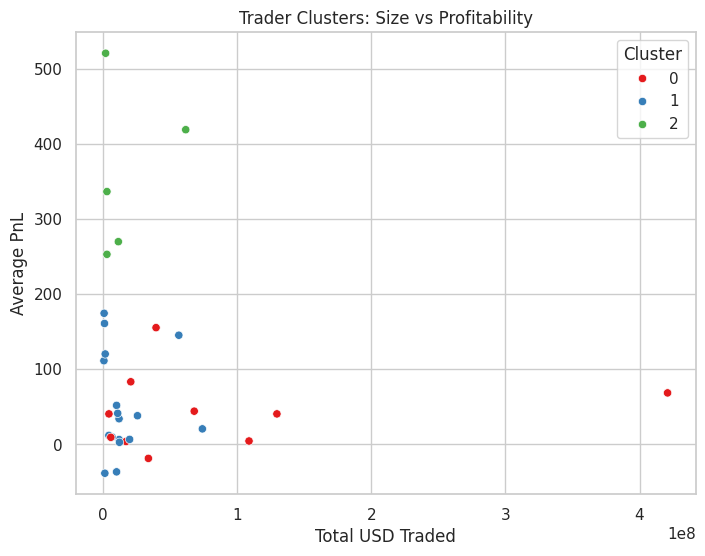

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, silhouette_score
import numpy as np

# Clean and prepare data
merged_df = merged_df.dropna(subset=['Execution Price', 'Size USD', 'Closed PnL', 'value'])
merged_df['Closed PnL'] = pd.to_numeric(merged_df['Closed PnL'], errors='coerce')
merged_df = merged_df.dropna()

X = merged_df[['value', 'Execution Price', 'Size USD']]
y = merged_df['Closed PnL']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = reg.score(X_test, y_test)

print("🔢 Linear Regression Metrics:")
print(f"  - Mean Squared Error: {mse:.2f}")
print(f"  - R-squared: {r2:.2f}")
print(f"  - Coefficients: {dict(zip(X.columns, reg.coef_))}")

#aggregate
trader_summary = merged_df.groupby('Account').agg({
    'Execution Price': 'mean',
    'Size USD': 'sum',
    'Closed PnL': 'mean',
    'value': 'mean'
}).reset_index()

# Normalize features
features = trader_summary[['Execution Price', 'Size USD', 'Closed PnL', 'value']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method + clustering
kmeans = KMeans(n_clusters=3, random_state=42)
trader_summary['Cluster'] = kmeans.fit_predict(scaled_features)
score = silhouette_score(scaled_features, trader_summary['Cluster'])

print(f"\n🧠 Clustering Complete - Silhouette Score: {score:.2f}")

# Visualize clusters
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=trader_summary['Size USD'], y=trader_summary['Closed PnL'],
                hue=trader_summary['Cluster'], palette='Set1')
plt.title('Trader Clusters: Size vs Profitability')
plt.xlabel('Total USD Traded')
plt.ylabel('Average PnL')
plt.show()


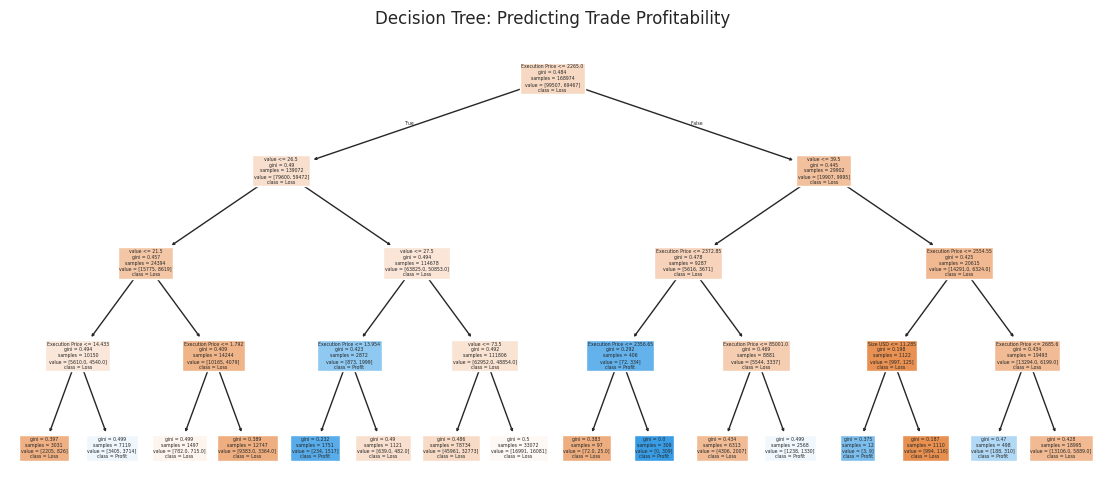

np.float64(0.543410215293594)

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

# Create a classification target: was the trade profitable?
merged_df['Profitable'] = (merged_df['Closed PnL'] > 0).astype(int)

# Features for classification
X_cls = merged_df[['value', 'Execution Price', 'Size USD']]
y_cls = merged_df['Profitable']

# Train/test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# Train decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train_cls, y_train_cls)

# Cross-validation score
cv_scores = cross_val_score(clf, X_cls, y_cls, cv=5)

# Plot tree
plt.figure(figsize=(14, 6))
plot_tree(clf, feature_names=X_cls.columns, class_names=["Loss", "Profit"], filled=True)
plt.title("Decision Tree: Predicting Trade Profitability")
plt.show()

# Output average CV accuracy
cv_scores.mean()


In [37]:
#CONCLUSION :
#This project demonstrates the integration of market sentiment data with trading performance metrics to uncover meaningful patterns and improve strategic decision-making.

#Key findings include:

#Fear and Greed Index shows subtle correlations with execution prices and trade profitability.

#Trade volumes are noticeably higher during "Fear" and "Greed" phases, suggesting more activity during moderate emotional conditions.

#Profitability analysis indicates that certain sentiment phases (e.g., "Greed") may be associated with better or worse trading outcomes.

#Regression analysis revealed a weak linear relationship between sentiment and profit, hinting at the influence of other hidden factors such as timing or trader strategy.

#Clustering successfully grouped traders into behavioral categories, enabling targeted strategy recommendations based on risk profiles and trade size.